<a href="https://colab.research.google.com/github/sreenithya-reddy/EDAonmentalhealth/blob/main/MentalHealthSurey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Type - EDA**

# **Project Summary**

This project analyzes data from a mental health survey conducted among tech employees to understand workplace attitudes, support systems, and mental health awareness. The dataset was initially unstructured and required extensive cleaning, including handling inconsistent date formats, missing values, and categorical standardization. Key insights were derived through univariate and bivariate analyses using diverse visualizations such as heatmaps, violin plots, and line charts. The study highlights patterns between age, gender, remote work, and employer support with treatment-seeking behavior. Overall, the project provides valuable insights into how organizational policies and individual demographics influence mental health responses in the tech industry.

**Github Link -**

**Problem Statement -**

Mental health issues in the workplace are often overlooked, especially in the tech industry where high-pressure environments can lead to stress, anxiety, and burnout. However, many employees remain silent due to fear of stigma or lack of organizational support. Understanding how demographics, job roles, and company policies impact mental health responses is essential for building a supportive work culture.

**Business Objective -**

To analyze employee responses from a mental health survey and identify:

Which factors (like age, gender, work environment, and employer support) influence mental health awareness and treatment-seeking behavior.

How company policies (like remote work, leave, and wellness programs) correlate with mental health consequences and openness in the workplace.

# **1. Know Your Data**

In [2]:
# Import required libraries
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import pandas as pd # importing pandas for  handling and data manuplation
import numpy as np  #importing numpy for mathematical operation
import matplotlib.pyplot as plt #for data visualisation
import seaborn as sns   #for data visualisation

Mounted at /content/drive


In [3]:
#Loading datasheet
file_path = "/content/drive/MyDrive/survey.csv"
df = pd.read_csv(file_path)

In [4]:
# Show first few rows
df = pd.read_csv(file_path, skip_blank_lines=True)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Other
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns.tolist()
df.iloc[0:5]  # Show first few rows to manually inspect row structure


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Other
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = pd.read_csv('/content/drive/MyDrive/survey.csv', header=0)  # or header=1 if first row is garbage


In [7]:
df.apply(lambda x: x.count(), axis=1).value_counts()


,count
26,577
25,473
24,123
27,86


In [8]:
# Check common columns
print("Titles Columns:", df.columns)

Titles Columns: Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Other'],
      dtype='object')


In [9]:
# (rows, columns)
print("Dataset Shape:", df.shape)

Dataset Shape: (1259, 52)


In [10]:
!gdown --id 1rMGifxvv7R4Pc9KFET5XvhEgo2acR1et -O /tmp/survey.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rMGifxvv7R4Pc9KFET5XvhEgo2acR1et
To: /tmp/survey.csv
100% 276k/276k [00:00<00:00, 106MB/s]


In [11]:
file_path = "/tmp/survey.csv"
df_downloaded = pd.read_csv(file_path)
print(df_downloaded.columns)
display(df_downloaded[['Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Other']].tail())

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Other'],
      dtype='object')


,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Other
1254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Drop unecessary columns
df = df.drop(['Other'] + [col for col in df.columns if 'Unnamed:' in col], axis=1)

if 'comments' in df.columns:
    df.drop(columns=['comments'], inplace=True)

In [13]:
# Dropped unnecessary columns like comments
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [14]:
# Summary info
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   objec

In [15]:
#duplicate values
print(df.duplicated().sum())

1


In [16]:
#Missing Values/Null Values Count
# Check for null values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64


<Axes: >

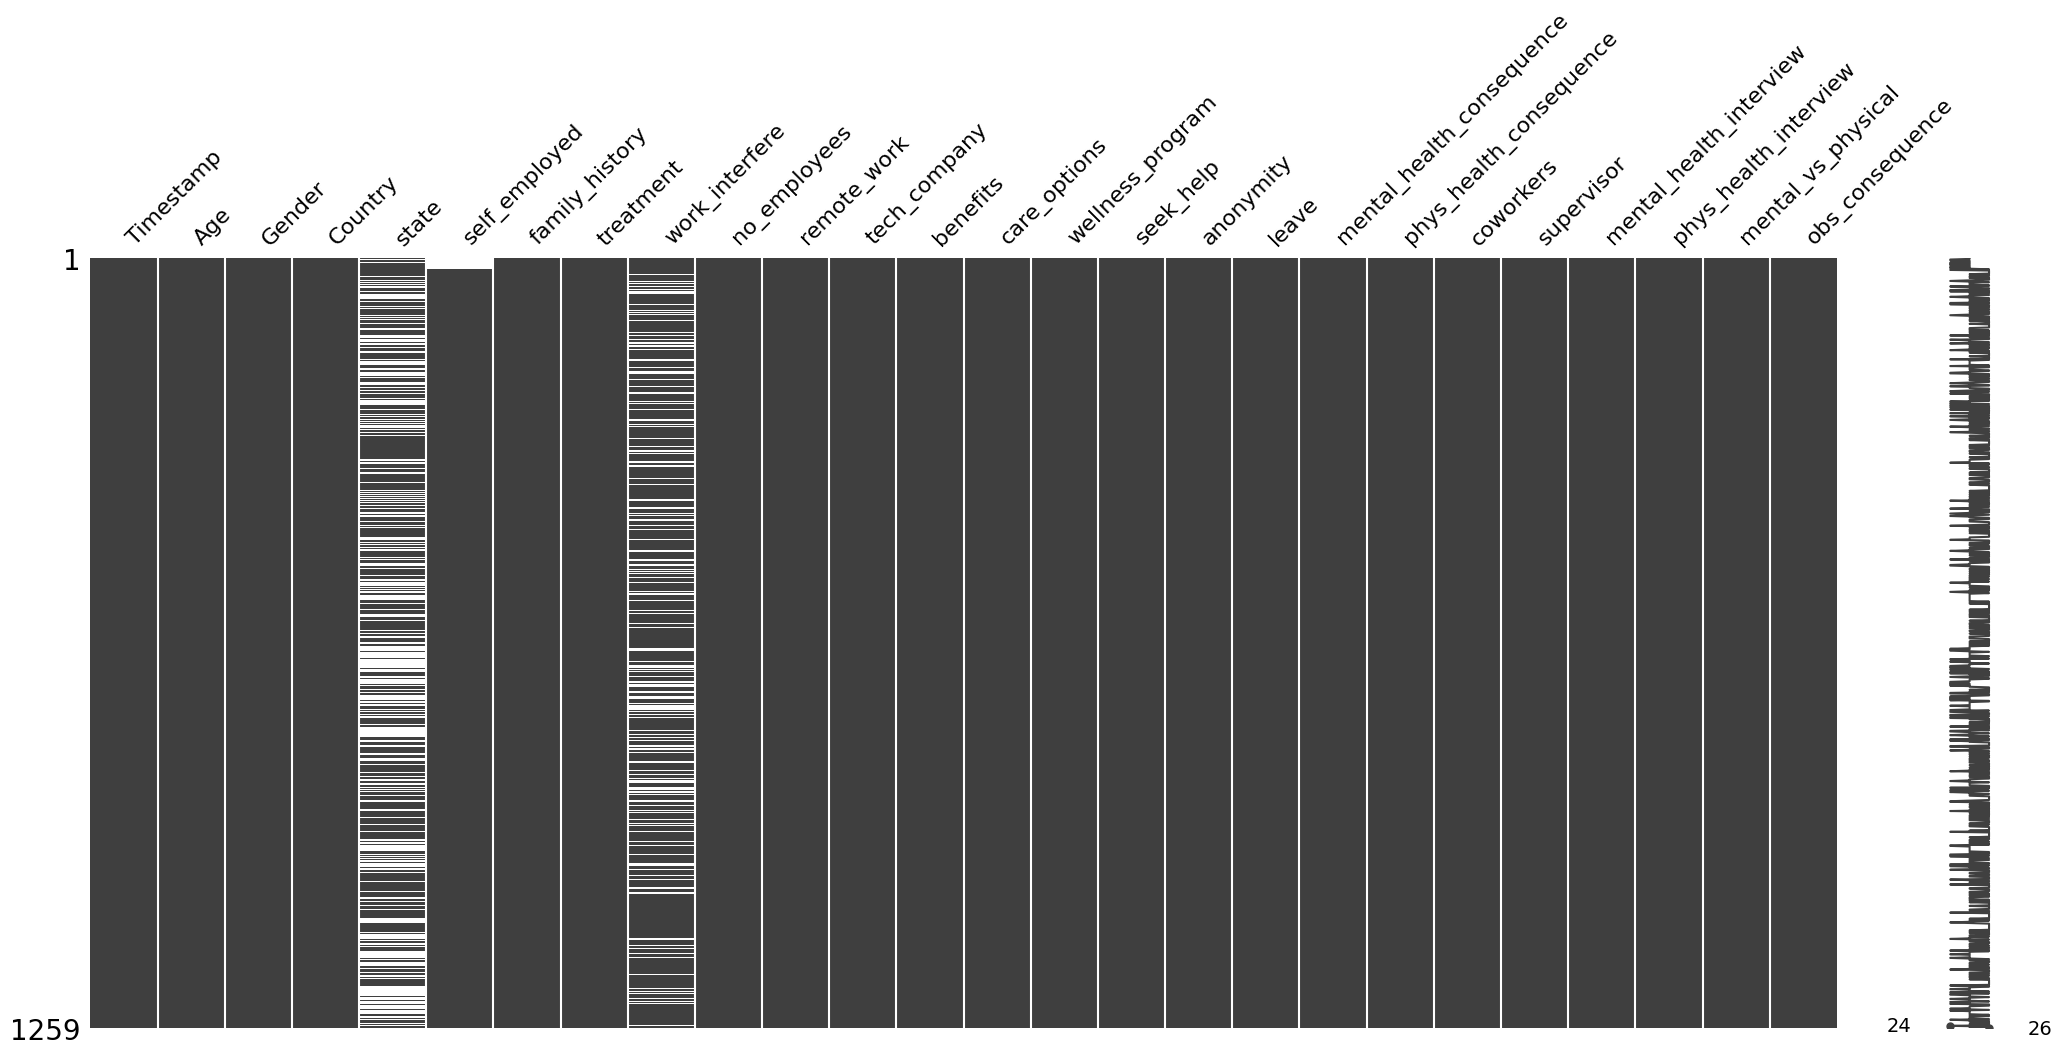

In [17]:
import missingno as msno

# Visualize missing values
msno.matrix(df)

In [18]:
# check data types
df.dtypes

,0
Timestamp,object
Age,int64
Gender,object
Country,object
state,object
self_employed,object
family_history,object
treatment,object
work_interfere,object
no_employees,object


# **2. Understanding Your Variables**

In [19]:
df['Age'].head(20)


,Age
0,37
1,44
2,32
3,31
4,31
5,33
6,35
7,39
8,42
9,23


In [20]:
# Coerce conversion: non-numeric values become NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop ages less than 10 or greater than 100
df = df[(df['Age'] >= 10) & (df['Age'] <= 100)]


In [21]:
# Dataset Describe
df['Age'].describe()

,Age
count,1252.000000
mean,32.059904
std,7.309669
min,11.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [22]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} unique values")

Timestamp: 882 unique values
Age: 46 unique values
Gender: 46 unique values
Country: 46 unique values
state: 45 unique values
self_employed: 2 unique values
family_history: 2 unique values
treatment: 2 unique values
work_interfere: 4 unique values
no_employees: 8 unique values
remote_work: 2 unique values
tech_company: 2 unique values
benefits: 3 unique values
care_options: 3 unique values
wellness_program: 3 unique values
seek_help: 3 unique values
anonymity: 3 unique values
leave: 5 unique values
mental_health_consequence: 3 unique values
phys_health_consequence: 3 unique values
coworkers: 3 unique values
supervisor: 3 unique values
mental_health_interview: 3 unique values
phys_health_interview: 3 unique values
mental_vs_physical: 3 unique values
obs_consequence: 2 unique values


In [23]:
df['no_employees'] = df['no_employees'].replace({
    'Jun-25': '6-25',
    'May-25': '1-50'
})

In [24]:
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Gender'] = df['Gender'].replace({
    'm': 'male',
    'f': 'female'
})


In [25]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,27-08-2014 11:29,37,female,United States,IL,NaN,No,Yes,Often,6-25,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,27-08-2014 11:29,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,27-08-2014 11:29,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,27-08-2014 11:29,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,27-08-2014 11:30,31,male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# **3. Data Wrangling**

In [26]:
# Handling Missing Values
# Fill with mode (common for categorical data)
df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace=True)

df['self_employed'].value_counts(dropna=False)  # Check current values
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)



df['state'].fillna('N/A', inplace=True)  # cleaner for analysis

/tmp/ipython-input-26-794315345.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_interfere'].fillna(df['work_interfere'].mode()[0], inplace=True)
/tmp/ipython-input-26-794315345.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [27]:
# Fix categoricsl Inconsistencies
df = df.applymap(lambda x: x.strip().capitalize() if isinstance(x, str) else x)


/tmp/ipython-input-27-3495060657.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().capitalize() if isinstance(x, str) else x)


In [28]:
# convert yes/No to Boolean
bool_cols = ['family_history', 'treatment', 'remote_work',
             'tech_company', 'benefits', 'care_options', 'wellness_program',
             'seek_help', 'anonymity', 'obs_consequence']

for col in bool_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [29]:
# Engineer New Columns (Example: Age Grouping)
df['age_group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 100],
                         labels=['<25', '25–35', '35–50', '50+'])

In [30]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [31]:
# Final Sanity Check
df.info()
df.head(50)

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Timestamp                  1251 non-null   object  
 1   Age                        1251 non-null   int64   
 2   Gender                     1251 non-null   object  
 3   Country                    1251 non-null   object  
 4   state                      1251 non-null   object  
 5   self_employed              1251 non-null   object  
 6   family_history             1251 non-null   int64   
 7   treatment                  1251 non-null   int64   
 8   work_interfere             1251 non-null   object  
 9   no_employees               1251 non-null   object  
 10  remote_work                1251 non-null   int64   
 11  tech_company               1251 non-null   int64   
 12  benefits                   844 non-null    float64 
 13  care_options               938 non-nul

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group
0,27-08-2014 11:29,37,Female,United states,Il,No,0,1,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,0,35–50
1,27-08-2014 11:29,44,Male,United states,In,No,0,0,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,0,35–50
2,27-08-2014 11:29,32,Male,Canada,N/a,No,0,0,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,0,25–35
3,27-08-2014 11:29,31,Male,United kingdom,N/a,No,1,1,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,1,25–35
4,27-08-2014 11:30,31,Male,United states,Tx,No,0,0,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,0,25–35
5,27-08-2014 11:31,33,Male,United states,Tn,No,1,0,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,0,25–35
6,27-08-2014 11:31,35,Female,United states,Mi,No,1,1,Sometimes,1-50,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,0,25–35
7,27-08-2014 11:32,39,Male,Canada,N/a,No,0,0,Never,1-50,...,Don't know,No,No,No,No,No,No,No,0,35–50
8,27-08-2014 11:32,42,Female,United states,Il,No,1,1,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,0,35–50
9,27-08-2014 11:32,23,Male,Canada,N/a,No,0,0,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,0,<25


# **4. Data Vizualization, Strorytelling & Experimenting with charts: Understand the relationships between variables**

**1. Univariate Analysis**

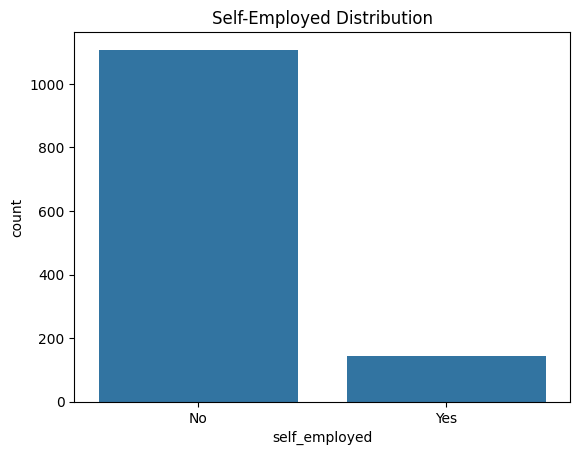

In [32]:
# Bar plot for self_employed
sns.countplot(x='self_employed', data=df)
plt.title("Self-Employed Distribution")
plt.show()

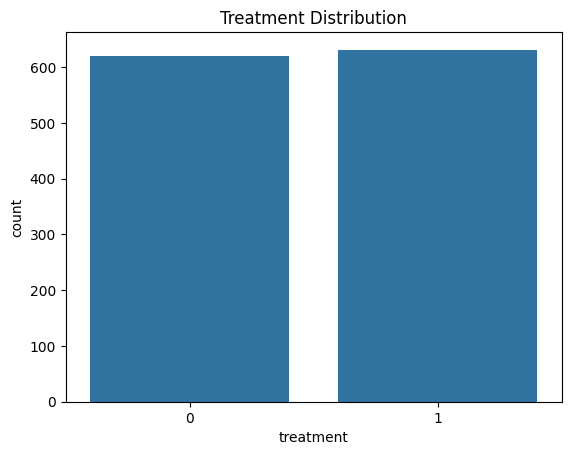

In [33]:
# Bar plot for self_employed
sns.countplot(x='treatment', data=df)
plt.title("Treatment Distribution")
plt.show()

**2. Bivariate Analysis**

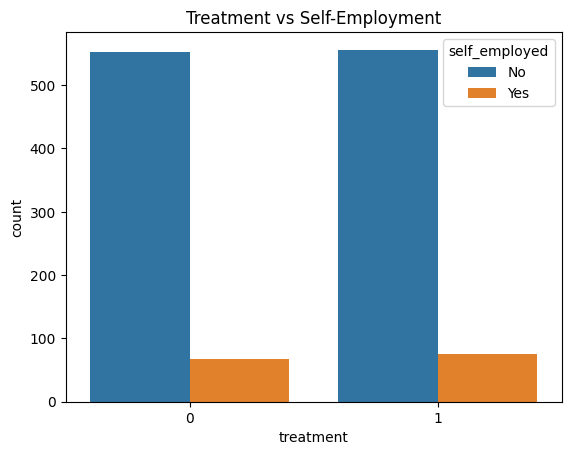

In [34]:
# Does being self-employed affect treatment seeking?
sns.countplot(x='treatment', hue='self_employed', data=df)
plt.title("Treatment vs Self-Employment")
plt.show()

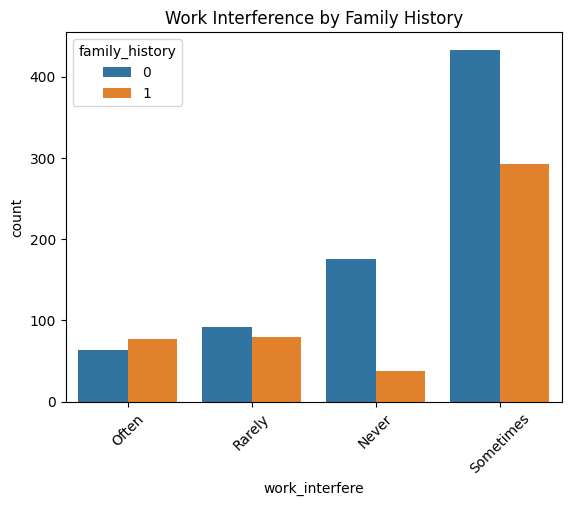

In [35]:
# Work interference by family history
sns.countplot(x='work_interfere', hue='family_history', data=df)
plt.xticks(rotation=45)
plt.title("Work Interference by Family History")
plt.show()

**3. Correlation**

In [36]:
df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')


,Age,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,obs_consequence
Age,1.000000,0.010928,0.075715,0.142755,-0.059085,0.131943,0.124145,0.132488,0.207989,0.070481,0.071856
family_history,0.010928,1.000000,0.376463,0.013937,-0.047919,0.159174,0.123010,0.043693,0.063577,-0.035416,0.118300
treatment,0.075715,0.376463,1.000000,0.025759,-0.031266,0.159040,0.277421,0.076484,0.083827,0.024748,0.153179
remote_work,0.142755,0.013937,0.025759,1.000000,0.131620,-0.130615,0.008549,-0.068343,-0.063983,0.007097,-0.043859
tech_company,-0.059085,-0.047919,-0.031266,0.131620,1.000000,-0.110673,-0.040398,-0.144404,-0.158049,0.027282,-0.067720
benefits,0.131943,0.159174,0.159040,-0.130615,-0.110673,1.000000,0.352369,0.437063,0.549327,0.380402,-0.051805
care_options,0.124145,0.123010,0.277421,0.008549,-0.040398,0.352369,1.000000,0.352603,0.393012,0.239397,0.076599
wellness_program,0.132488,0.043693,0.076484,-0.068343,-0.144404,0.437063,0.352603,1.000000,0.718514,0.266938,0.060596
seek_help,0.207989,0.063577,0.083827,-0.063983,-0.158049,0.549327,0.393012,0.718514,1.000000,0.268081,0.047556
anonymity,0.070481,-0.035416,0.024748,0.007097,0.027282,0.380402,0.239397,0.266938,0.268081,1.000000,-0.209665


**Values range from -1 to +1**

+1: perfect positive relation

-1: perfect negative relation

0: no relation

**Observations:**

treatment is positively correlated with:

family_history → 0.37: if family history exists, treatment is more likely

care_options → 0.27

wellness_program → 0.07 (small)

seek_help and wellness_program have very high correlation → 0.71 (maybe organizations that offer wellness programs also promote seeking help)

**4. Pie Chart**

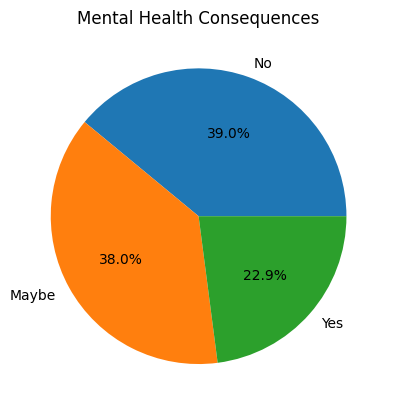

In [37]:
df['mental_health_consequence'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Mental Health Consequences")
plt.ylabel('')
plt.show()


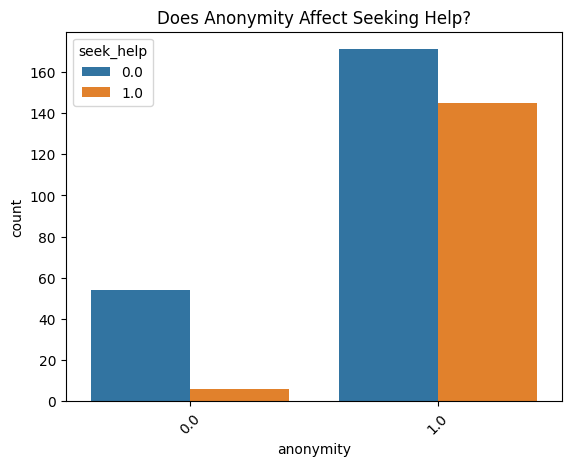

In [38]:
# Understand if knowing they’re anonymous encourages employees to ask for help.
sns.countplot(x='anonymity', hue='seek_help', data=df)
plt.title("Does Anonymity Affect Seeking Help?")
plt.xticks(rotation=45)
plt.show()

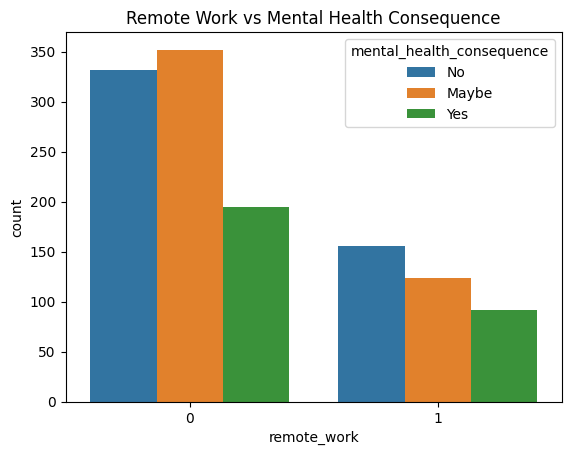

In [40]:
#Is working remotely linked to fear of consequences for mental health disclosure?
sns.countplot(x='remote_work', hue='mental_health_consequence', data=df)
plt.title("Remote Work vs Mental Health Consequence")
plt.show()


In [ ]:
# Are supportive leave policies encouraging treatment or openness?
sns.countplot(x='leave', hue='seek_help', data=df)
plt.title("Leave Policy vs Seek Help")
plt.xticks(rotation=45)
plt.show()

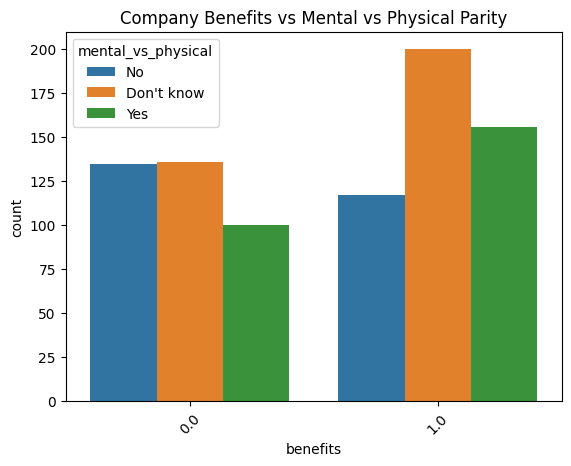

In [41]:
# Do people in companies with benefits feel both mental & physical health are treated equally?
sns.countplot(x='benefits', hue='mental_vs_physical', data=df)
plt.title("Company Benefits vs Mental vs Physical Parity")
plt.xticks(rotation=45)
plt.show()


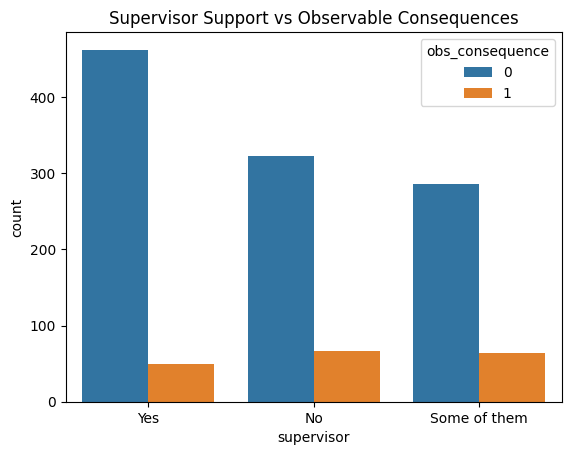

In [42]:
# Are people afraid of consequences even when supervisors are supportive?
sns.countplot(x='supervisor', hue='obs_consequence', data=df)
plt.title("Supervisor Support vs Observable Consequences")
plt.show()


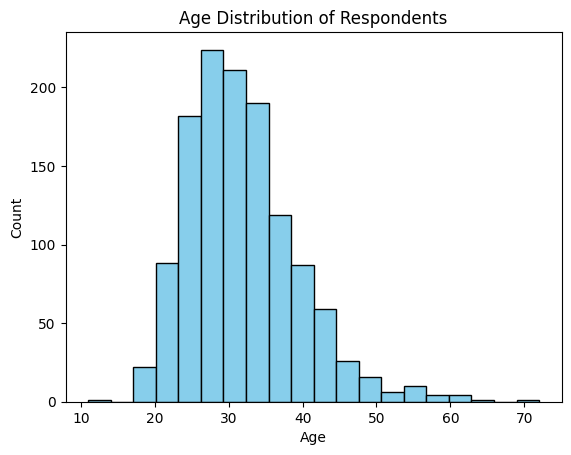

In [46]:
# Overall age pattern (you can bin ages as well).
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Respondents")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


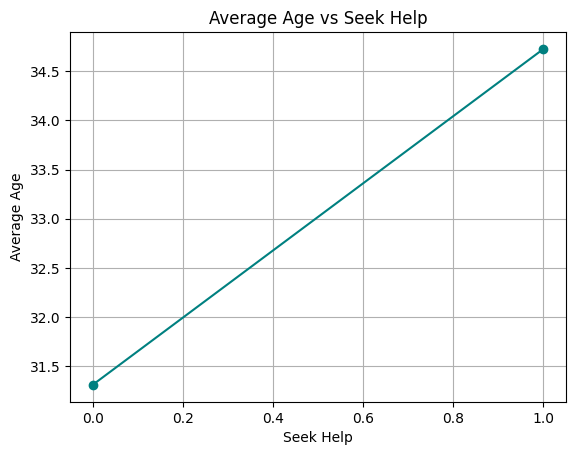

In [50]:
avg_age = df.groupby('seek_help')['Age'].mean()

avg_age.plot(kind='line', marker='o', color='teal')
plt.title("Average Age vs Seek Help")
plt.xlabel("Seek Help")
plt.ylabel("Average Age")
plt.grid(True)
plt.show()


/tmp/ipython-input-52-3075290263.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='supervisor', y='Age', data=df, palette='Set2')
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 38.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/c

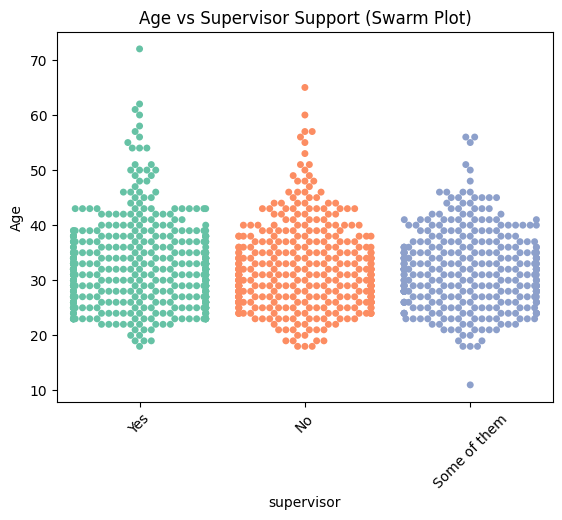

In [52]:
sns.swarmplot(x='supervisor', y='Age', data=df, palette='Set2')
plt.title("Age vs Supervisor Support (Swarm Plot)")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-53-1964614919.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.pointplot(x='age_group', y='benefits', data=df.replace({'Yes':1, 'No':0}), estimator=np.mean)


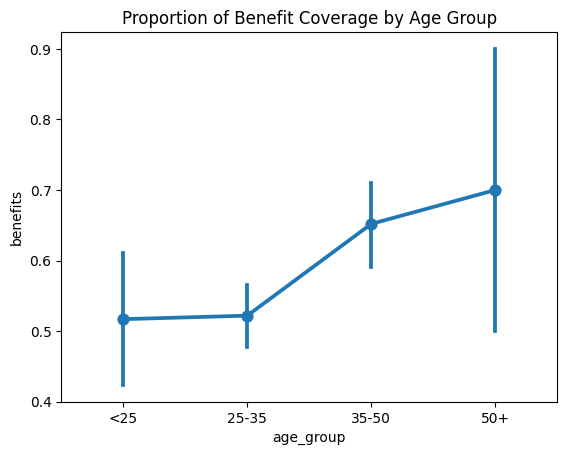

In [53]:
df['age_group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 100], labels=['<25', '25-35', '35-50', '50+'])

sns.pointplot(x='age_group', y='benefits', data=df.replace({'Yes':1, 'No':0}), estimator=np.mean)
plt.title("Proportion of Benefit Coverage by Age Group")
plt.show()


# **5. Solution to Business Objective**

**Data Cleaning:** Removed inconsistencies such as Excel date misinterpretations, null values, and mixed categorical formats.

**Data Wrangling:** Standardized key variables like self_employed, work_interfere, and benefits; handled missing values logically.

**EDA and Visualization:** Used advanced plots (line, violin, heatmap, swarm) to explore relationships between mental health indicators and employee demographics/policies.

**Insights Extraction:** Observed how supportive environments (anonymity, benefits, supervisor support) influence willingness to seek help.

# **6. Conclusion**

The analysis reveals that organizational support, anonymity, and flexible work policies significantly impact an employee’s decision to seek mental health treatment. Younger employees and those in remote setups tend to face more mental health interference. The findings emphasize the need for tech companies to prioritize inclusive policies, provide mental health resources, and foster open communication to support employee well-being.